In [3]:
from __future__ import print_function

In [4]:
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
data=pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1", index_col=[0])


In [13]:
data.shape

(1999, 1)

In [14]:
data.head()

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


BeautifulSoup to remove HTML

Then we will remove non-letters and will split the sentences into words

Removal of Stopwords

In [16]:
def clean(x):
    #Remove Html
    x=BeautifulSoup(x).get_text()

    #Remove Non-Letters
    x=re.sub('[^a-zA-Z]',' ',x)

    #Convert to lower_case and split
    x=x.lower().split()

    #Remove stopwords
    stop=set(stopwords.words('english'))
    words=[w for w in x if not w in stop]

    #join the words back into one string
    return(' '.join(words))

data.Text=data.Text.apply(lambda x:clean(x))
data.head()


,Text
1,kunalb alien
2,id aa carmack ray tracing cyberpunk hdr next l...
3,joerogan spotify great interview
4,gtera doge underestimated
5,teslacn congratulations tesla china amazing ex...


In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *


In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
from nltk import tokenize

In [20]:
sid = SentimentIntensityAnalyzer()

In [21]:
data['sentiment_compound_polarity']=data.Text.apply(lambda x:sid.polarity_scores(x)['compound'])
data['sentiment_neutral']=data.Text.apply(lambda x:sid.polarity_scores(x)['neu'])
data['sentiment_negative']=data.Text.apply(lambda x:sid.polarity_scores(x)['neg'])
data['sentiment_positive']=data.Text.apply(lambda x:sid.polarity_scores(x)['pos'])
data['sentiment_type']=''
data.loc[data.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
data.loc[data.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
data.loc[data.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
data.shape
data.head()

,Text,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_positive,sentiment_type
1,kunalb alien,0.0000,1.000,0.000,0.000,NEUTRAL
2,id aa carmack ray tracing cyberpunk hdr next l...,0.0000,1.000,0.000,0.000,NEUTRAL
3,joerogan spotify great interview,0.6249,0.423,0.000,0.577,POSITIVE
4,gtera doge underestimated,-0.2732,0.488,0.512,0.000,NEGATIVE
5,teslacn congratulations tesla china amazing ex...,0.8271,0.510,0.000,0.490,POSITIVE


1) We can see the individual analysis of Elon Musks tweets.

2)We can further analyze the Polarity of his tweets to get a better picture.

3)Whether his tweets are Positive Negative of Neutral.

Here we use Vader_lexicon technique

# Now we use Sentiment Analysis technique

In [22]:
!pip install wordcloud

In [23]:
import os
import numpy as np
import keras
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
import math
import nltk
import csv
import sklearn
import plotly.offline as py
import plotly.graph_objs as go
import textblob
from math import sqrt
from matplotlib import pyplot
from wordcloud import WordCloud
from collections import Counter
from sklearn.metrics import mean_squared_error
from textblob import TextBlob
from nltk.corpus import stopwords
from pandas import DataFrame
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances

#nltk.download('stopwords')

py.init_notebook_mode(connected = True)
%matplotlib inline
#os.getcwd()


In [24]:
df=pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")

In [25]:
df.shape
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [26]:
# Data Cleanse #
df['Text'] = df['Text'].str.replace(r'http\S+', " ", case=False) # Remove HTML
df['Text'] = df['Text'].str.replace('RT @[\w]*', " ", case=False)
df['Text'] = df['Text'].str.replace('&gt', " ", case=False)
df['Text'] = df['Text'].str.replace("[^a-zA-Z#]", " ", case=False) #Non-letters
df['Text'] = df['Text'].str.replace("www", " ", case=False)

In [27]:
# Test - Remove words < 3 characters (to remove stop words)#
newdf = df.copy()
newdf['CText'] = newdf['Text'].apply(lambda x: ' '.join([w for w in x.split() if
                                                       len(w)>3]))

In [28]:
#Tokenizer#
tokens = newdf['CText'].apply(lambda x: x.split())
tokens.head()


0                                      [kunalb, alien]
1    [Carmack, tracing, Cyberpunk, with, next, leve...
2                [joerogan, Spotify, Great, interview]
3                        [gtera, Doge, underestimated]
4    [teslacn, Congratulations, Tesla, China, amazi...
Name: CText, dtype: object

In [29]:
newdf.tail()

,Unnamed: 0,Text,CText
1994,1995,flcnhvy True it sounds so surreal but the n...,flcnhvy True sounds surreal negative propagand...
1995,1996,PPathole Make sure to read ur terms amp con...,PPathole Make sure read terms conditions befor...
1996,1997,TeslaGong PPathole Samwise Gamgee,TeslaGong PPathole Samwise Gamgee
1997,1998,PPathole Altho Dumb and Dumber is U F ...,PPathole Altho Dumb Dumber
1998,1999,Progress update August,Progress update August


In [30]:
#Remove common words + stop words - NLTK #
# play, player, played, plays --> play #

stop_words = set(stopwords.words('english'))
from nltk.stem.porter import *
stemmer = PorterStemmer() #stemming
tokens = tokens.apply(lambda x: [stemmer.stem(i)
                                 for i in x])

for i in range(len(tokens)):
    tokens[i] = ' '.join(tokens[i])

tokens2 = []
for w in tokens:
    if w not in stop_words:
        tokens2.append(w)

newdf['Tokens'] = tokens
newdf['Text'].replace('', np.nan, inplace=True)
newdf.dropna(subset=['Text'], inplace=True)
newdf.head()


,Unnamed: 0,Text,CText,Tokens
0,1,kunalb I m an alien,kunalb alien,kunalb alien
1,2,ID AA Carmack Ray tracing on Cyberpunk with H...,Carmack tracing Cyberpunk with next level Have...,carmack trace cyberpunk with next level have tri
2,3,joerogan Spotify Great interview,joerogan Spotify Great interview,joerogan spotifi great interview
3,4,gtera Doge is underestimated,gtera Doge underestimated,gtera doge underestim
4,5,teslacn Congratulations Tesla China for amazi...,teslacn Congratulations Tesla China amazing ex...,teslacn congratul tesla china amaz execut last...


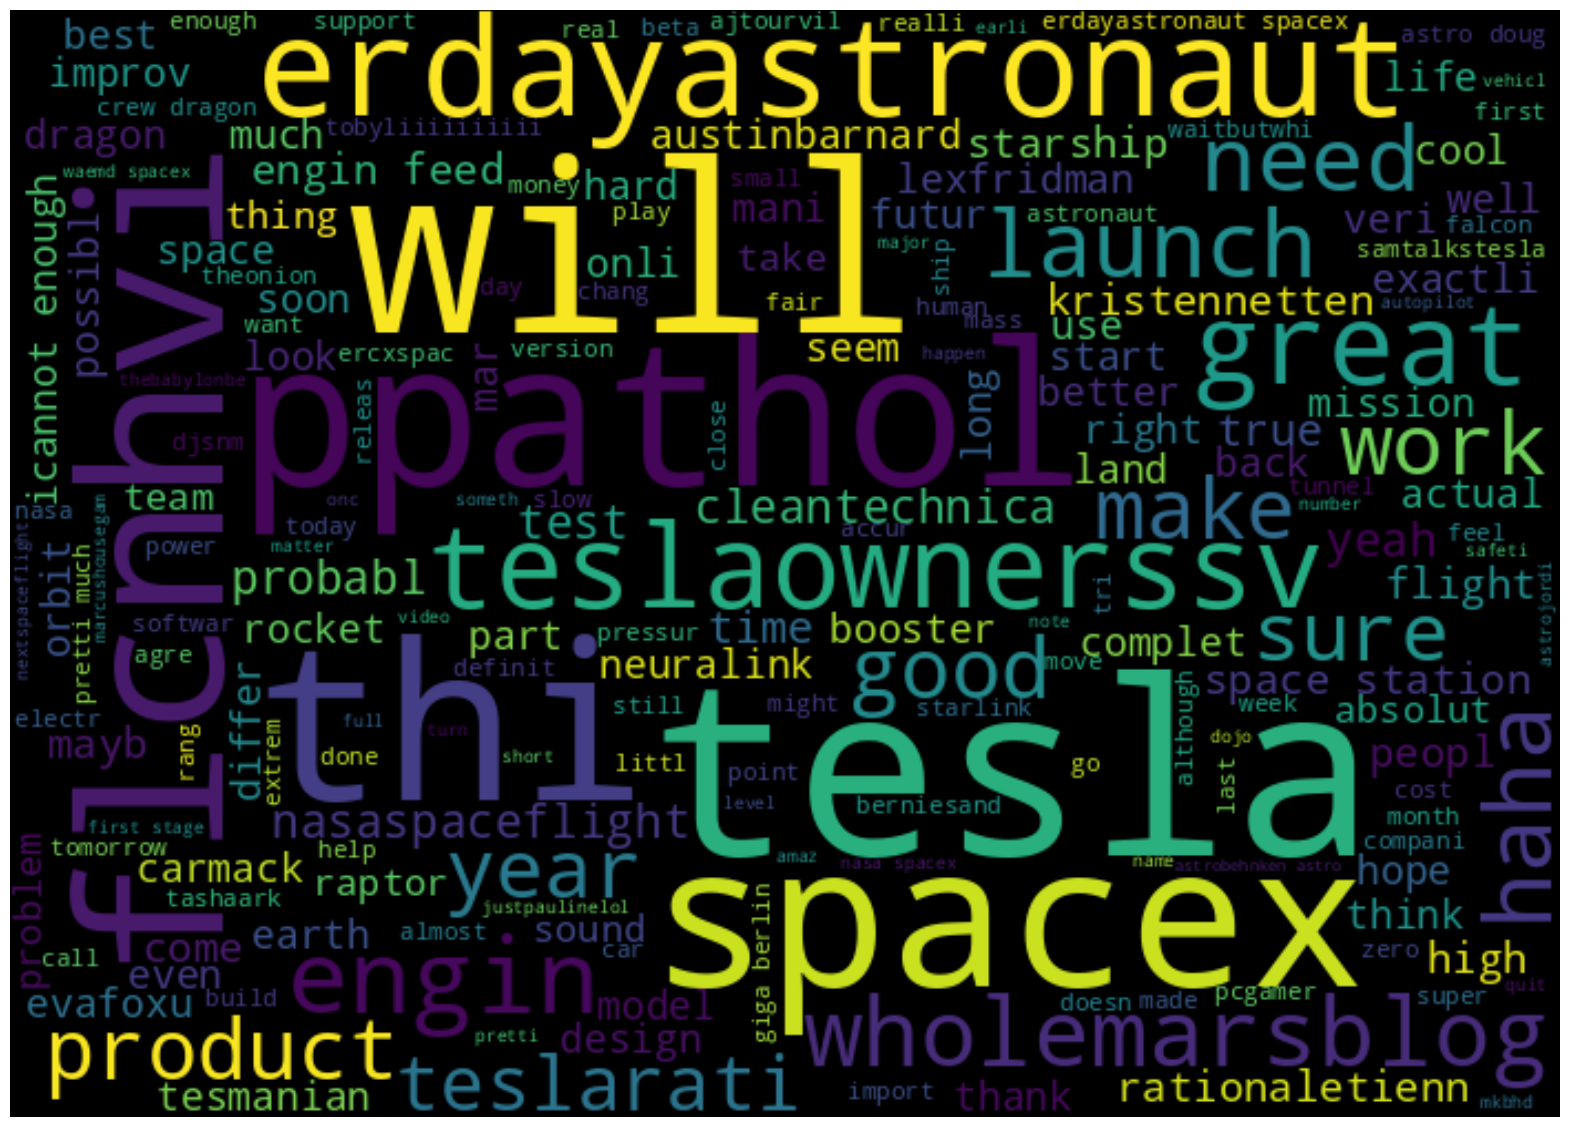

In [32]:
all_words = ' '.join([text for text in newdf['Tokens']])
wordcloud = WordCloud(width=700,
                      height=500,
                      random_state=21,
                      max_font_size=110).generate(all_words)

plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


# We can observe the most of his tweets are about:

) SpaceX mission launches.

)Tesla Models (Electric vehicels)

)Astronuts

)Future projects

)Launches

)Products


# Text Blob - Sentiment Analysis (polarity)

In [33]:
def sentiment(x):
    sentValue = TextBlob(x)
    return sentValue.sentiment.polarity

newdf['sentiment'] = newdf['Text'].apply(sentiment)

conditions = [
    (newdf['sentiment'] > 0 ), #Positive
    (newdf['sentiment'] < 0), #Negative
    (newdf['sentiment'] == 0)] #Neutral

choices = ['positive', 'negative', 'neutral']
newdf['Pol_Name'] = np.select(conditions, choices, default=' ')
#newdf




In [35]:
#Total Stats#
print('total df', len(newdf))
print('positive df', sum(newdf['Pol_Name'] == 'positive')/len(newdf)*100, '%')
print('negative df', sum(newdf['Pol_Name'] == 'negative')/len(newdf)*100, '%')
print('neutral df',sum(newdf['Pol_Name'] == 'neutral')/len(newdf)*100, '%')

total df 1999
positive df 44.772386193096544 %
negative df 11.605802901450724 %
neutral df 43.621810905452726 %


1) We can see that most of Elon Musks tweets are Positive (44.7%).

2) We can also observe most of his tweets are Neutral (43.6%).

3) Almost 11% of his tweets are Negative.